In [15]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation, MaxPool2D
from tensorflow.keras.layers import BatchNormalization, Flatten, Reshape, Conv2DTranspose, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
print("")

In [17]:
## Seeding
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
## Loading the dataset and then normalizing the images.
dataset = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = dataset.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [19]:
## Hyperparameters
H = 28
W = 28
C = 1


In [20]:
## Latent space
latent_dim = 128


In [21]:
## Building the autoencoder
inputs = Input(shape=(H, W, C), name="inputs")
x = inputs

In [22]:
x = Conv2D(32, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)


In [23]:
x = Conv2D(64, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)

In [24]:
x = Flatten()(x)
units = x.shape[1]
x = Dense(latent_dim, name="latent")(x)
x = Dense(units)(x)
x = LeakyReLU(alpha=0.2)(x)
x = Reshape((7, 7, 64))(x)

In [25]:
x = Conv2DTranspose(64, (3, 3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)

In [26]:
x = Conv2DTranspose(1, (3, 3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = Activation("sigmoid", name="outputs")(x)

In [27]:
outputs = x

In [28]:
autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer=Adam(1e-3), loss='binary_crossentropy')
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496 

In [29]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [30]:
autoencoder.fit(
    x_train,
    x_train,
    epochs=20,
    batch_size=256,
    shuffle=False,
    validation_data=(x_test, x_test)
)

Epoch 1/20
235/235 [==============================] - 149s 628ms/step - loss: 0.4641 - val_loss: 0.5116
Epoch 2/20
235/235 [==============================] - 137s 585ms/step - loss: 0.3890 - val_loss: 0.3912
Epoch 3/20
235/235 [==============================] - 137s 583ms/step - loss: 0.3511 - val_loss: 0.3497
Epoch 4/20
235/235 [==============================] - 137s 581ms/step - loss: 0.3266 - val_loss: 0.3250
Epoch 5/20
235/235 [==============================] - 136s 580ms/step - loss: 0.3098 - val_loss: 0.3060
Epoch 6/20
235/235 [==============================] - 137s 581ms/step - loss: 0.2978 - val_loss: 0.2967
Epoch 7/20
235/235 [==============================] - 135s 574ms/step - loss: 0.2889 - val_loss: 0.2883
Epoch 8/20
235/235 [==============================] - 136s 578ms/step - loss: 0.2821 - val_loss: 0.2803
Epoch 9/20
235/235 [==============================] - 134s 572ms/step - loss: 0.2768 - val_loss: 0.2767
Epoch 10/20
235/235 [==============================] - 136s 578m

In [31]:
test_pred_y = autoencoder.predict(x_test)

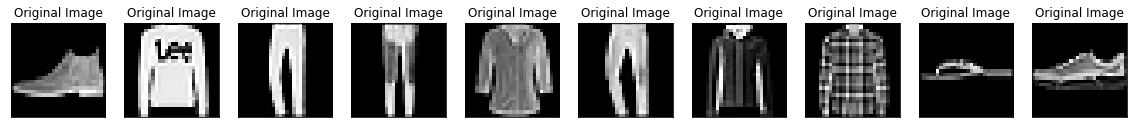

In [32]:
n = 10  ## how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ## display original
    ax = plt.subplot(2, n, i + 1)
    ax.set_title("Original Image")
    plt.imshow(x_test[i].reshape(H, W))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

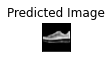

In [33]:
  ## display reconstruction
ax = plt.subplot(2, n, i + 1 + n)
ax.set_title("Predicted Image")
plt.imshow(test_pred_y[i].reshape(H, W))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig("/content/convolutonal_autoencoder.png")